Question 1
----------
Question 1(a):
[[0.5507979  0.70814782 0.29090474 0.51082761 0.89294695]
 [0.89629309 0.12558531 0.20724288 0.0514672  0.44080984]
 [0.02987621 0.45683322 0.64914405 0.27848728 0.6762549 ]
 [0.59086282 0.02398188 0.55885409 0.25925245 0.4151012 ]]
Question 1(b):
[[0.28352508]
 [0.69313792]
 [0.44045372]
 [0.15686774]]
Question 1(c):
[[0.5507979  0.70814782 0.29090474 0.51082761 0.89294695 0.89629309
  0.12558531 0.20724288 0.0514672  0.44080984]
 [0.02987621 0.45683322 0.64914405 0.27848728 0.6762549  0.59086282
  0.02398188 0.55885409 0.25925245 0.4151012 ]]
Question 1(d):
[[ 0.26727282  0.42462274  0.00737966  0.22730252  0.60942187]
 [ 0.20315517 -0.56755261 -0.48589504 -0.64167072 -0.25232807]
 [-0.41057751  0.01637951  0.20869033 -0.16196644  0.23580118]
 [ 0.43399508 -0.13288586  0.40198635  0.10238471  0.25823346]]
Question 1(e):
[0.28352508 0.69313792 0.44045372 0.15686774]
Question 1(f):
[[0.5507979  0.70814782 0.29090474 0.28352508 0.89294695]
 [0.896293

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:233: RuntimeWarning: overflow encountered in exp


Weight Vector: [-298.31609526    9.49035521  267.60988919    7.42398492]
10000 iterations performed
Learning Rate: 1
Q4 Weight Vector: [0.01694442 1.49601981 0.03738886]
Q4 Bias Term: -2.6250489555396475


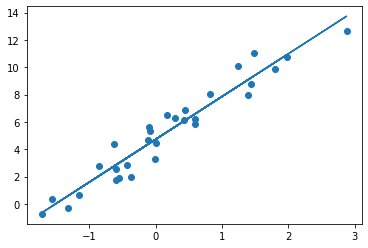

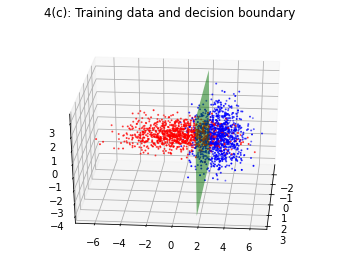

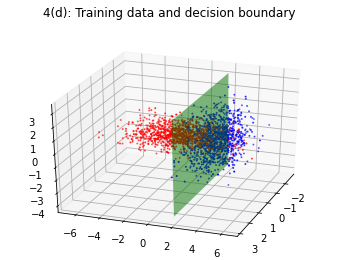

In [127]:
import numpy as np
import numpy.random as rnd
import time
import math
import bonnerlib3D as bl3d
import matplotlib.pyplot as plt
import pickle

rnd.seed(3)

print("Question 1") 
print("----------")

print("Question 1(a):") 
B = rnd.rand(4,5)
print(B)

print("Question 1(b):") 
y = rnd.rand(4,1)
print(y)

print("Question 1(c):") 
C = B.reshape((2, 10))
print(C)

print("Question 1(d):")
D = B - y
print(D)

print("Question 1(e):")
z = y.reshape(4)
print(z)

print("Question 1(f):")
B[:,3] = z
print(B)

print("Question 1(g):")
D[:,0] = B[:,2] + z
print(D)

print("Question 1(h):")
print(B[:3])

print("Question 1(i):") 
print(np.array([B[:,1], B[:,3]]))

print("Question 1(j):") 
print(np.log(B))

print("Question 1(k):")
print(np.sum(B))

print("Question 1(l):")
print(B.max(axis = 0))

print("Question 1(m):")
print(max(B.sum(axis=1)))

print("Question 1(n):") 
np.matmul(B.T, D)

print("Question 1(o):")#incomplete
print(np.matmul(np.matmul(np.matmul(y.T, D), D.T), y))

print("Question 2") 
print("----------")

#print("Question 2(a):")

def matrix_poly(A):
    for o in range(2):
        temp = [np.zeros((len(A), len(A))), np.zeros((len(A), len(A)))]
        for i in range(len(A)):
            for j in range(len(A)):
                if o == 0:
                    temp[o][i][j] = A[i][j]*A[j][i]
                else:
                    temp[o][i][j] = A[i][j]*(A[j][i] + temp[0][j][i])

    return A+temp[1]

#print("Question 2(b):")

def timing(N):
    A = rnd.rand(N,N)
    start_time1 = time.time()
    B1 = matrix_poly(A) 
    print("matrix_poly takes %s seconds" % (time.time() - start_time1))
    start_time2 = time.time()
    B2 = A + (np.matmul(A, A + np.matmul(A, A))) 
    print("Vectorized takes %s seconds" % (time.time() - start_time2))
    mag_diff = math.sqrt(np.sum((B1-B2)**2))
    print(mag_diff)


print("Question 2(c):")

print("timing(100):")
timing(100)
print("timing(300):")
timing(300)
print("timing(1000):")
timing(1000)
#Q: In each case, how many floating-point multiplications does matrix_poly perform?
# matrix_poly performs 2*n^2 floating point mulitplications

print("Question 3") 
print("----------")
#print("Question 3(a):")

def least_squares(x,t): 
    X = np.concatenate((np.ones((len(x), 1)), x.reshape((len(x), 1))), axis=1)
    w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), t)

    return [w[1], w[0]]#returns optimal [a,b]

#print("Question 3(b):")

def plot_data(x,t):
    para = least_squares(x,t)
    plt.scatter(x, t) # create scatter plot of training data
    y = para[0]*x + para[1]
    plt.plot(x, y) # create fitted line

#print("Question 3(c):")

def error(a,b,X,T): #?? Double check
    y = a*X+b
    mse = sum((T-y)**2) / len(X) 
    return mse

print("Question 3(d):")

with open("dataA1Q3.pickle","rb") as f: 
  dataTrain,dataTest = pickle.load(f)


plot_data(dataTrain[0], dataTrain[1])
coef = least_squares(dataTrain[0], dataTrain[1])
print("a is %s and b is %s" % (coef[0], coef[1]))

print("Training error")
print(error(coef[0], coef[1], dataTrain[0], dataTrain[1]))
print("Test error")
print(error(coef[0], coef[1], dataTest[0], dataTest[1]))


print("Question 4") 
print("----------")
print("Question 4(a):")

import sklearn.linear_model as lin
with open("dataA1Q4v2.pickle","rb") as f: 
    Xtrain,Ttrain,Xtest,Ttest = pickle.load(f)
clf = lin.LogisticRegression() # create a classification object, clf clf.fit(Xtrain,Ttrain) # learn a logistic-regression classifier
clf.fit(Xtrain,Ttrain)
w = clf.coef_[0] # weight vector
w0 = clf.intercept_[0] # bias term
print("Weight vector: %s" % (w))
print("Bias Term: %s" % (w0))


print("Question 4(b):")

#using score
clf.score(Xtrain, Ttrain)
accuracy1 = clf.score(Xtrain, Ttrain)  #average number of correct predictions
#using w and w0
print(w)
print(Xtest)
z = np.matmul(Xtest, w) + w0
y = np.where(z>=0, 1, 0)
accuracy2 = np.sum(y == Ttest)/len(y) #FIX??
print("accuracy1: %s" % (accuracy1))
print("accuracy2: %s" % (accuracy2))
print("Difference:", (accuracy1 - accuracy2))

print("Question 4(c):")
bl3d.plot_db(Xtrain,Ttrain,w,w0,30,5)
plt.suptitle("4(c): Training data and decision boundary")

print("Question 4(d):")
bl3d.plot_db(Xtrain,Ttrain,w,w0,30,20)
plt.suptitle("4(d): Training data and decision boundary")


print("Question 5:")
print("----------")

def gd_logreg(lrate):
    global Xtrain
    global Xtest
    global Ttrain
    global Ttest
    #Cross Entropy function (loss) :t*np.logaddexp(0,-z) + (1-t)*np.logaddexp(0,z)
    rnd.seed(3)
    N = Xtrain.shape[1]
    weights = rnd.rand(N+1) / 1000 #weights + bias term
    #prepend column of 1s
    Xtrain = np.concatenate((np.ones((len(Xtrain), 1)), Xtrain), axis=1)
    Xtest = np.concatenate((np.ones((len(Xtest), 1)), Xtest), axis=1)
    
    ce_train = np.array([[0]*N, [1000]*N])
    ce_test = []
    a_train = []
    a_test = []

    iterations = 0 #counts # iter
  
    #initial weight update
    z = np.matmul(weights, Xtrain.T)
    y = 1/(1 + np.exp(-z))
    weights = weights - ((lrate/N)*np.matmul(Xtrain.T,(y-Ttrain)))

    while (iterations < 10000 ): #(np.abs(ce_train[-2] - ce_train[-1]) > 10**(-10)).any()
      #training loss 
      z = np.matmul(weights, Xtrain.T)
      y = 1/(1 + np.exp(-z))
      np.append(ce_train, (Ttrain*np.logaddexp(0,-z) + (1-Ttrain)*np.logaddexp(0,z))/N)
      #training accuracy
      
      holder = y > 0.5
      predictions = holder.astype(int)
      holder2 = predictions == Ttrain
      a_train.append(np.mean(holder2))
      

      #test loss
      z2 = np.matmul(weights, Xtest.T)
      y2 = 1/(1 + np.exp(-z2))
      ce_test.append((Ttest*np.logaddexp(0,-z2) + (1-Ttest)*np.logaddexp(0,z2))/N)
      #test accuracy
      
      holder = y2 > 0.5
      predictions = holder.astype(int)
      holder2 = predictions == Ttest
      a_test.append(np.mean(holder2))
      

      #weight update
      weights = weights - ((lrate/N)*np.matmul(Xtrain.T,(y-Ttrain)))
      iterations +=1
      #print(iterations)
      
    #e)
    print("Weight Vector:", weights)
    print("%s iterations performed" % (iterations))
    print("Learning Rate:", lrate)
    print("Q4 Weight Vector:", w)
    print("Q4 Bias Term:", w0)

gd_logreg(1)


    



